<h2 align="center"> Univariate Linear Regression with Numpy and Pandas </h2>

The aim of this study is to perform univariate linear regression on a bike sharing dataset.



## Getting to Know the Dataset


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [36]:
df = pd.read_csv("bike_sharing_data.txt")
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [37]:
df.shape

(97, 2)

## EDA - Exploratory Data Analysis


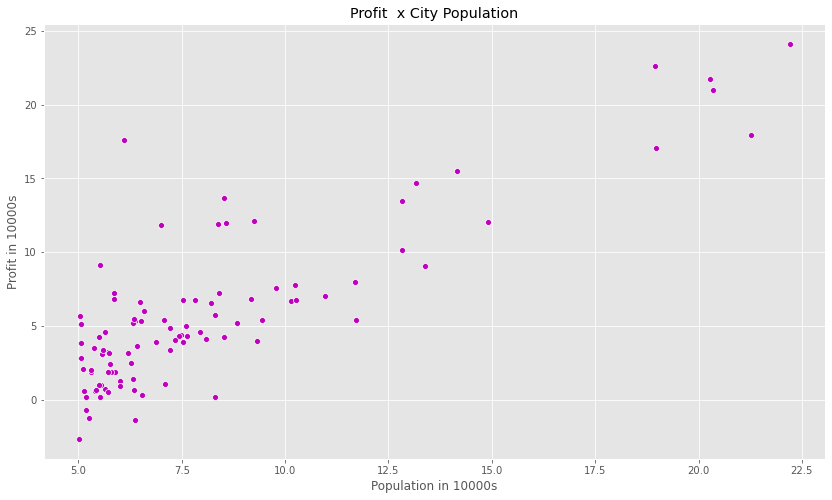

In [47]:
plt.figure(figsize=(14,8))
ax = sns.scatterplot(x= "Population", y = "Profit", data=df, color='m')
plt.ylabel('Profit in 10000s')
plt.xlabel('Population in 10000s')
ax.set_title("Profit  x City Population");

###  Linear Regression 

Objetive is to minimize fuction below (known as cost function):
$$ J(\theta) = (1/2*m)*sum(h(\theta)(x^i) - y^i )^2 $$

$$ h(\theta)(x) = (\theta)'x = \theta0 + \theta1(x1) $$

Now we will define a function to compute the cost function solved with matrices X and y. The 'error' term is the calculation of the squared term from the equation above.

In [48]:
def cost_function(X,y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2

    return (1/(2*m)) * np.sum(error)


Thw next steps are:
- Treat the intercept as an all ones matrix
- Theta values initialized as all zeros
- Test the implementation of the cost function

In [51]:
m = df.Population.values.size
X = np.append(np.ones((m , 1)), df.Population.values.reshape(m , 1), axis=1)
y = df.Profit.values.reshape(m,1)
theta = np.zeros((2,1)) 
cost_function(X, y, theta) 

32.072733877455676

##  Gradient Descent to minimize $ J(\theta) $


Minimize cost function by repeating the equation below until convergence:

$$(\theta)j = (\theta)j - (\alpha)*(1/m)*sum(h(\theta)(x^i) - y) $$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [54]:
def gradient_descent(X, y, theta, alpha, iterations): 
    m = len(y)
    costs = [] #list of values of J of theta - tracking the history
    for i in range(iterations):
        y_pred = X.dot(theta)
        #error term:
        error = np.dot(X.transpose(), (y_pred - y))
        #theta changes with each iteration
        theta -= alpha *(1/m) * error
        costs.append(cost_function(X, y, theta)) 
        return theta, costs



Now running gradient descent on our data:

In [55]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))

h(x) = 0.06 + 0.65x1


In [56]:
costs

[6.737190464870006]

## Visualizing cost function


In [57]:
from mpl_toolkits.mplot3d import Axes3D

In [58]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

#Initial cost values
cost_values = np.zeros((len(theta_0), len(theta_1)))

#iterating through the spaces of theta zero and theta one
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)


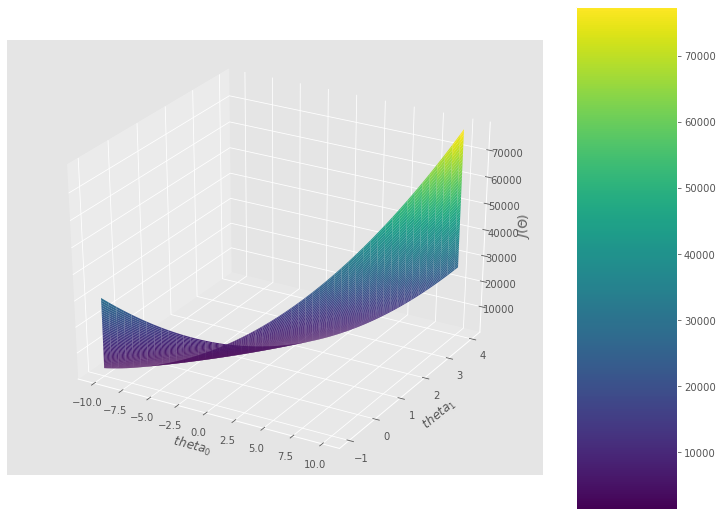

In [61]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink = 5, aspect = 5)

plt.xlabel("$\ theta_0$")
plt.ylabel("$\ theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 300) # rotating the plot

plt.show;

## Final Plot with linear regression

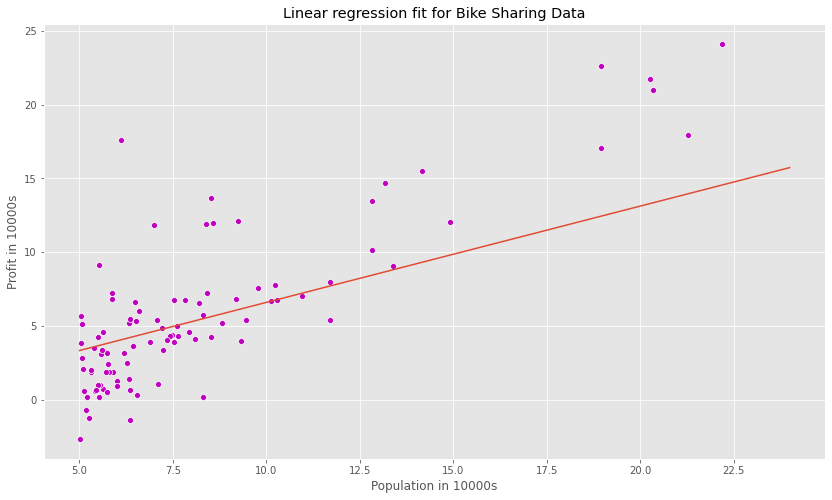

In [70]:
plt.figure(figsize=(14,8))
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data = df, color = 'm')

x_value = [x for x in range(5, 25)]
y_value = [(x*theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in 10000s")
plt.title("Linear regression fit for Bike Sharing Data");

In [72]:
#Selecting a population for prediction
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str((y_pred_1,)))


For a population of 40,000 people, the model predicts a profit of $(26715.453403377334,)
